# What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA) is a way of analysing data with the use of visual plots in order to summarize their main characteristics. Some examples of plots used include histograms, scatter plots and box plots. It is used to tell us what the data can tell us beyond traditional methods of formal modelling and hypothesis testing. EDA can help getting an overall view of the data but also focus on describing and analysing a particular sample. 

# In Class Strategies 


In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
print(type(iris))
print(iris.keys())
iris['target_names']

#creating dataframe for iris dataset and then diplaying the last 3 variables in a tabular format
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names) 
full_df = df.copy()
full_df['Target']=y
full_df['Target_Text'] = full_df.Target.apply(lambda x: {0: 'Setosa', 1: 'Versicolour',
                                                         2: 'Virginica'}[x])
full_df.tail(n=3)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Text
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica
149,5.9,3.0,5.1,1.8,2,Virginica


In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
setosa_petal_length = full_df[full_df['Target'] == 0]['petal length (cm)']  # Iris-Setosa
setosa_petal_width = full_df[full_df['Target'] == 0]['petal width (cm)']  # Iris-Setosa

versicolor_petal_length = full_df[full_df['Target'] == 1]['petal length (cm)']  # Iris-Versicolour
versicolor_petal_width = full_df[full_df['Target'] == 1]['petal width (cm)']  # Iris-Versicolour

virginica_petal_length = full_df[full_df['Target'] == 2]['petal length (cm)']  # Iris-Virginica
virginica_petal_width = full_df[full_df['Target'] == 2]['petal width (cm)']  # Iris-Virginica

**Strategy 1:** **Step 1:** The first step before implementing any strategies is to simply import the dataset. After loading the dataset, a .key() method is used to return a view object which contains the keys of the dictionary as a list. Now that we know the keys of the dataset, we can search the dataset as we please. This is seen above where we view the target names in the dataset and also a description of it. 

**Step 2:** In order to conduct EDA, we must import plotting modules to allow us to display data on various different types of plots and graphs.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

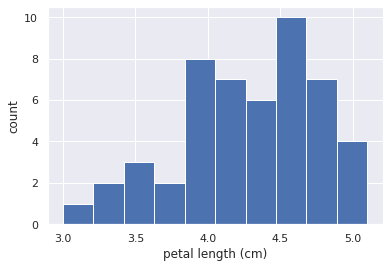

In [ ]:

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()

The first strategy to be implemented is to plot the three species types on individual histograms. To complete this strategy, we must adjust the number of bins in each histogram. Bins are simply the blocks used to combine values before getting the frequency. For the sake of analysis accuracy, I will keep the number the same as when practiced in the lecture.

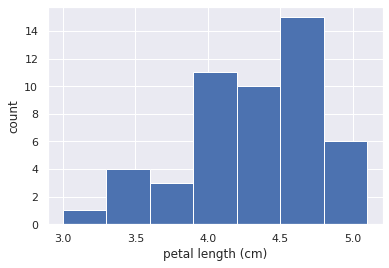

In [ ]:
import numpy as np

#number od datapoints in the case of versicolor
n_data = len(versicolor_petal_length)

#bins = square root of number of datapoints
n_bins = np.sqrt(n_data)

#converted to int
n_bins = int(n_bins)

#histogram plotted
plt.hist(versicolor_petal_length, bins=n_bins)

#axes labels
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

plt.show()

The above code shows that the code is now working and displays an example of a histogram for versicolor. The graph shows it is skewed to the left with more than half of the versicolour's petal length being greater than 4cm. I will now continue to plot histograms for virginica and sertosa. 

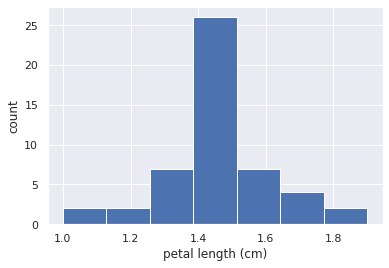

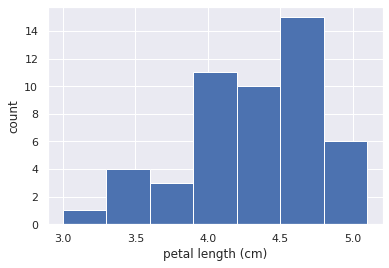

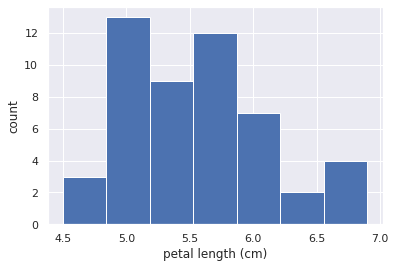

In [ ]:
plt.hist(setosa_petal_length, bins=n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
plt.show()

plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
plt.show()

plt.hist(virginica_petal_length, bins=n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
plt.show()

The purposes of the histogram strategy is to roughly assess the probability distribution of a variable. It does this by depicting the frequencies of observations that occur in a particular range of values.
Some benefits of this strategy is the ability to visualize the distribution of the data, particularly when dealing with large datasets. It also helps quickly identify what way the data is skewed. 

**Strategy 2:** The next strategy to be implemented is a bee swarm plot. It is a one dimesional plot that does not have any overlapping points, despite them being quite tightly packed. To create a bee swarm plot in Python, the seaborn package needs to be imported. Below I will plot the data using seaborn's default settings. 

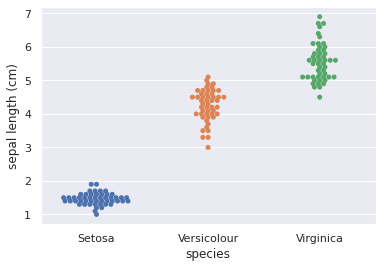

In [ ]:
_ = sns.swarmplot(x='Target_Text', y='petal length (cm)', data=full_df) 

#axes labels 
_ = plt.xlabel('species')
_ = plt.ylabel('sepal length (cm)')
plt.show()

From the chart we can see all individual data points plotted on the graph for each of the three species. It can be clearly seen that there is an overlap in the sepal length with Versicolour and Virginica, however Setosa's sepal length is shorter and thus not overlapping. Thus the benefit and purpose of bee swarm plots is the ability to emphasize the distribution of individual points, as opposed to containing them in bins like a histogram. 

**Strategy 3:** The third strategy I will implement in this EDA is the Empirical Cumulative Distributive Function, or ECDF for short. The ECDF is a probability distribution you get when taking a sample from your sample. Thus it will give you a fraction of sample observations less than or equal to a value (x). I will explain this after plotting the ECDF graph. In this example we will be computing an ECDF for a one-dimensional array of elements, and more specifically for the setosa species.

In [ ]:
#creating an ecdf function
def ecdf(data):
  #number of datapoints
  n = len(data)

  #creating x-data
  x = np.sort(data)

  #creating y-data
  y = np.arange(1, n+1) / n

  return x, y

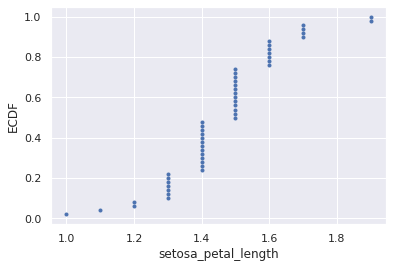

In [ ]:
x_vers, y_vers = ecdf(setosa_petal_length)

#making the plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

#axes labels
_ = plt.xlabel('setosa_petal_length') 
_ = plt.ylabel('ECDF')

plt.show()

The above code shows us that 75% of setosa has a petal length less than 1.5 and 25% of setosa has a petal lenght less than 1.3. Similarly to bee swarm plot, a benefit of the ECDF is the ability to view individual data points as opposed to binning them together on a histogram. This ECDF function can be taken a step further and the three species can be plotted alongside each other for comparison.

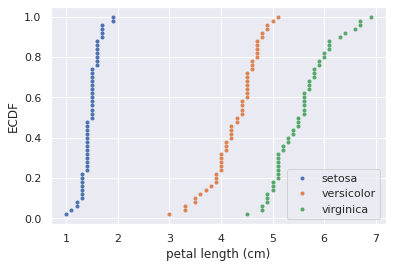

In [ ]:
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)



#all ECDFS plotted on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

#define the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


plt.show()

When plotting the three species alongside each other, it is clear to see that the petal length varies less than with the other two species, with virginica varying the most. Thus another benefit of the ECDF is to be able to compare and contrast the sample observatoins less than a given value.

**Strategy 4:** The fourth and final strategy is to calculate the mean and  median from the dataset. The median calculates the middle value of the dataset while the mean calculates the average value. . The purpose for calculating both is because they give you a representation of the distribution of the dataset. If the mean and median are different, it shows the data is not symetrical. The advantage of using the mean is that it takes account of all values, but it can be affected by very large or very small values. The advantage of the median is it is not affected by very small or large values. It's limitation however is that in the case of an even number of values in the dataset, the two middle numbers are averaged and hence the mdeian value may not be an original value in the dataset. Below will show an example of showing the mean and median for the setosa petal length on a seaborn plot. 

Mean: I. setosa: 1.4620000000000002 cm
Median: I. setosa: 1.5 cm


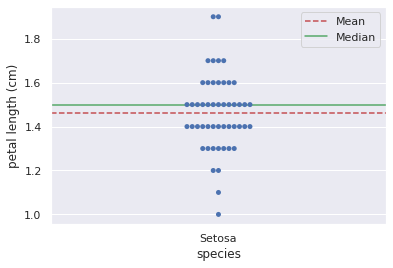

In [ ]:
# Compute the mean: mean_length_vers
mean_length_seto = np.mean(setosa_petal_length)
median_length_seto = np.median(setosa_petal_length)
# Print the result with some nice formatting
print('Mean: I. setosa:', mean_length_seto, 'cm')
print('Median: I. setosa:', median_length_seto, 'cm')

# Create bee swarm plot with Seaborn's default settings
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='petal length (cm)', 
                  data=full_df[full_df['Target_Text'] == 'Setosa'])
ax.axhline(mean_length_seto, color='r', linestyle='--')
ax.axhline(median_length_seto, color='g', linestyle='-')

plt.legend({'Mean':mean_length_seto,'Median':median_length_seto})

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
# annotation


# Show the plot
plt.show()

# Wine Dataset EDA
Before we conduct EDA on this particular dataset, first it must be imported. After this I use the .keys() method which gives us the various keys in the dictionary. From here I created a dataframe to make the data easier to view, and displayed the last 5 rows in a data table. This gives a good look at what data we are dealing with and can mve forward with the EDA.

In [ ]:
wine = datasets.load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [ ]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
X = wine.data
y = wine.target
df2 = pd.DataFrame(X, columns=wine.feature_names) 
full_df2 = df2.copy()
full_df2['Target']=y
full_df2['Target_Text'] = full_df2.Target.apply(lambda x: {0: 'class_0', 1: 'class_1',
                                                         2: 'class_2'}[x])
full_df2.tail(n=5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,Target_Text
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2,class_2


In [ ]:
class_0_alcohol = full_df2[full_df2['Target']==0]['alcohol']
class_0_color = full_df2[full_df2['Target']==0]['color_intensity']

class_1_alcohol = full_df2[full_df2['Target']==1]['alcohol']
class_1_alcohol = full_df2[full_df2['Target']==1]['color_intensity']

class_2_alcohol = full_df2[full_df2['Target']==2]['alcohol']
class_2_alcohol = full_df2[full_df2['Target']==2]['color_intensity']

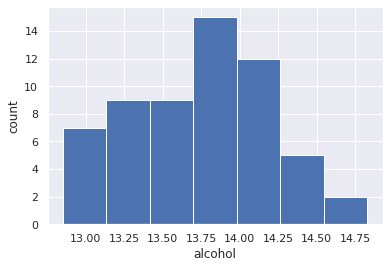

In [ ]:
#Plotting Histogram for amount of alcohol levels per class

plt.hist(class_0_alcohol, bins=n_bins)
_ = plt.xlabel('alcohol')
_ = plt.ylabel('count')
plt.show()



The above is a histogram for displaying the wines in class_0 alongside their alcohol percentages. From the plot, it is evident that this histogram is some-what bell shaped, if not slightly right skewed. We can also say that more than half the class_0 wines alcohol percentage is within the range of 13%-14%. 

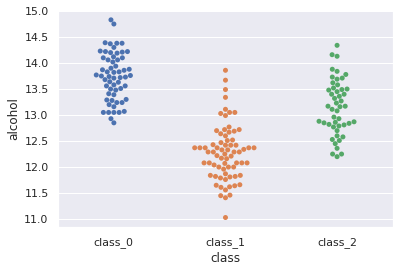

In [ ]:
_ = sns.swarmplot(x='Target_Text', y='alcohol', data=full_df2) 

# Label the axes
_ = plt.xlabel('class')
_ = plt.ylabel('alcohol')

# Show the plot
plt.show()

The above graph shows a bee swarm plot for each class in the wine dataset. Being able to see the individual plots allows us to analyse the data more effectively. Class_1 shows to contain wines with weaker alcohol strength, with the majority of the datapoints lying underneath the 12.5% mark. Its data points are also more dispersed in comparison to the other two classes with an alchol range as low as 11% all the way to just shy of 14%. !t does have some cross over with class_0 and class_2 on the upper end of its bee swarm plot. Class_0 is evidently the strongest class of wines, but it does have a lot of cross over with class_2, particularly in between the range of 13%-14%.

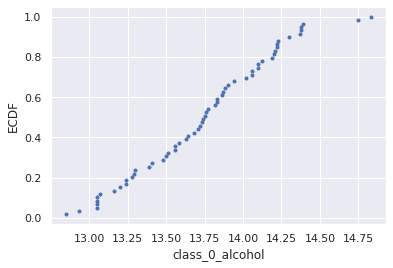

In [ ]:
x_class_0, y_class_0 = ecdf(class_0_alcohol)

#making the plot
plt.plot(x_class_0, y_class_0, marker='.', linestyle='none')

#axes labels
_ = plt.xlabel('class_0_alcohol') 
_ = plt.ylabel('ECDF')

plt.show()

The above graph shows the ECDF function being used on the alcohol percentage data in class_0. It shows that about 70% of the wines in the class have an alcohol percentage of 14% or less. 

Mean: I. class_0 alcohol: 13.744745762711865 %
Median: I. class_0 alcohol: 13.75 %


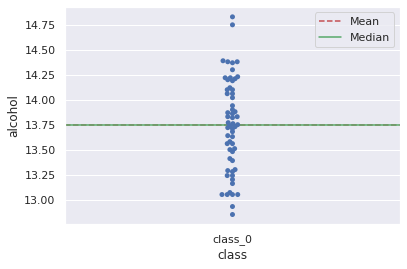

In [ ]:
mean_class_0 = np.mean(list(class_0_alcohol))
median_class_0 = np.median(list(class_0_alcohol))

print('Mean: I. class_0 alcohol:', mean_class_0, '%')
print('Median: I. class_0 alcohol:', median_class_0, '%')


ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='alcohol', 
                  data=full_df2[full_df2['Target_Text'] == 'class_0'])
ax.axhline(mean_class_0, color='r', linestyle='--')
ax.axhline(median_class_0, color='g', linestyle='-')

plt.legend({'Mean':mean_class_0,'Median':median_class_0})


_ = plt.xlabel('class')
_ = plt.ylabel('alcohol')

plt.show()

The above graph is used to show the mean and median in the case of class_0. As we can see from the calculation that the mean and median are less than 1% away from each other. This would insinuate that the dispersion of class_0 is very tight and there are no outliers in the class. Thus it can be said that there is little to no skeweness in class_0 with regards to alcohol percentage. 

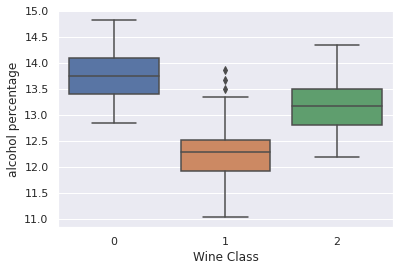

In [ ]:
_ = sns.boxplot(x='Target', y='alcohol', data = full_df2)
_ = plt.xlabel('Wine Class')
_ = plt.ylabel('alcohol percentage')
plt.show()

Above you can see the final EDA strategy, a boxplots. Boxplots are a measure of how well the data in a dataset are distributed. On the graph you can see the min,max and median, as well as the first and third quartiles. This range in between the first and third quarter is also known as the interquartile range, and this shows the middle 50% of the data. Also on boxplots there can sometimes be outliers, which is evident on class one's boxplot. From the above boxplots, we can see that the three wine classes are all normally distributed. It can also be seen that the class 0 has the greatest median and class 1 having the smallest, showing a difference in the alcohol levels in each class. The three boxes are all of similar size, showing that the data is equally dispersed among the the three classes.  